<div style="border:solid steelblue 1px; padding: 20px">
Описание проекта "Продажи видеоигр"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<br />Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br /> Описание данных

<br /> Name — название игры
<br /> Platform — платформа 
<br /> Year_of_Release — год выпуска
<br /> Genre — жанр игры
<br /> NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br /> EU_sales — продажи в Европе (миллионы проданных копий)
<br /> JP_sales — продажи в Японии (миллионы проданных копий)
<br /> Other_sales — продажи в других странах (миллионы проданных копий)
<br /> Critic_Score — оценка критиков (максимум 100)
<br /> User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br /> Данные за 2016 год могут быть неполными.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Обзор данных

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- Необходимо изменить тип данных в Year_of_Release, User_Score - на инт (тк толко год) и флоат соответственно.

Проверим количество пропусков в процентах - если пропусков меньше 5% можем смело от них избавляться, это не повредит данные. Так же посмотрим сумарно пропуски по столбцам.

In [7]:
pd.DataFrame(data.isna().sum()).style.background_gradient()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


<div style="border:solid steelblue 1px; padding: 20px">
Видим, что от пропусков в столбцах Name, Genre, Year_of_Release можем избавиться, тк их менее 5% от дата фрейма.

Заполнить пропуски необходимо в таких столбцах, как Critic_Score, User_Score, Rating - от строк с пропусками избавиться нельзя, тк таких данных от 40 до 50% от датафрейма. 

Так же в задании к проекту было сказано, что в столбце User_Score есть значение 'tbd' - to be defined (будет определено). Выяснил, что данное значение является обычным для игровой индустрии сокращением и означает, что, если мы говорим о рейтинге, он еще не сформирован, мб из-за недотстака количества отзывовлибо же неотображения их. 

В любом случае, не вижу возможным заполнить данное значение каким-либо числовым показателем и считаю верным присвоить ему значение NaN (отсутствия данных).

In [8]:
data[data['User_Score'] == 'tbd']['User_Score'].count()
#необходимо поменять значения в 2424 строках

2424

In [9]:
data.duplicated().sum()
#дубликаты отсутствуют, однако стоит привести названия игр к одному виду и проверить еще раз

0

<div style="border:solid steelblue 1px; padding: 20px">
    При первичном анализе данных были выявлены следующие аспекты на предобработку:

1) изменение названий столбцов
2) изменение названий игры и дополнительная проверка на дубликаты
3) заполнение и удаление пропусков
4) изменение типов данных
5) необходимо по заданию собрать еще один столбец - суммарная продажа игры


## Предобработка данных

### Измение названия 
Приведем названия столбцов и названия игр к нижнему регистру

In [12]:
data.columns = data.columns.str.lower()

In [13]:
data['name'] = data['name'].str.lower()

In [14]:
#проверим дубликаты после изменения - их нет
data.duplicated().sum()

0

### Уберем пропуски 

- Отбросим данные, пропуски в которых составляют менее 5% 

In [15]:
data.dropna(subset=['name'], inplace=True)

In [16]:
data.dropna(subset=['year_of_release'], inplace=True)

In [17]:
data.dropna(subset=['genre'], inplace=True)

- Пропуски в рейтинге заполним значением "не определено" (RP)

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
data['rating'] = data['rating'].fillna('RP')

In [24]:
data['rating'] = data['rating'].str.lower()
data['rating'].unique()

array(['e', 'rp', 'm', 't', 'e10+', 'k-a', 'ao', 'ec'], dtype=object)

In [ ]:
rating_mapping = {'ec': 0, 'e': 1, 'e10+': 2, 't': 3, 'm': 4,
                 'ao': 5, 'k-a': 1}

# Применить словарь к столбцу 'sub_grade'
data['rating'] = data['rating'].map(rating_mapping)

In [26]:
data['rating'].unique()

array(['1', 'rp', '4', '3', '110+', '5', '0'], dtype=object)

In [27]:
#проверим изменения
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Изменение типов данных

- Не вижу необходимым менять тип данных в году выхода игры на дататайм, тк там указан только год. Изменим на инт

In [29]:
data['year_of_release'] = pd.to_datetime(
    data['year_of_release'], format='%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

- С изменением типов данных в 'user_score' сразу уберим и значение "tbd".

In [30]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [31]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заметил повторы в названиях игры

In [33]:
data['name'].value_counts()

need for speed: most wanted                      12
fifa 14                                           9
ratatouille                                       9
lego marvel super heroes                          9
cars                                              8
                                                 ..
itoi shigesato no bass tsuri no. 1 ketteihan!     1
miyako                                            1
age of empires iii                                1
metal gear solid: snake eater 3d                  1
singstar guitar                                   1
Name: name, Length: 11426, dtype: int64

In [34]:
data[data['name'] == 'need for speed: most wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,3
523,need for speed: most wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,rp
1190,need for speed: most wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,3
1591,need for speed: most wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,3
1998,need for speed: most wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,3
2048,need for speed: most wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,rp
3581,need for speed: most wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,3
5972,need for speed: most wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,3
6273,need for speed: most wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,rp
6410,need for speed: most wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,1


- После проверки выяснилось, что это переиздания игры для разных платформ, либо, скорее всего с какими-нибудь существенными дополнениями. Считаю, что не нужно избавляться от этих повторов, так как они отображают разную информацию для различных платформ, что не является дублированием.

Создание столбца с суммой продаж

In [35]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div style="border:solid steelblue 1px; padding: 20px">
    На данном шаге предобработка завершена. Были изменены типы данных, удалены малозначительное количество пропусков, заменено значение tbd на nan. 

Пропуски в столбцах с оценкой критиков и пользователей, а так же в рейтинге игры не представляется возможным заполнить, тк они не системные, нет зависимости между ними. Отставлю их в таком виде.

## Исследовательский анализ

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [39]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<div style="border:solid steelblue 1px; padding: 20px">
    Считаю данные за 2012-2016 нерепрезентатвиными, тк скорее всего не были получены еще все данные. Но их нельзя исключать из выборки, тк они отображают информацию по актулаьным платформам.  Пиковый период - 2009 и 2010 года. В них суммарно было выпущено более 2800 игр. считаю, что стоит рассматривать период с 1992 по 2015г

[Text(0, 0.5, 'количество продаж')]

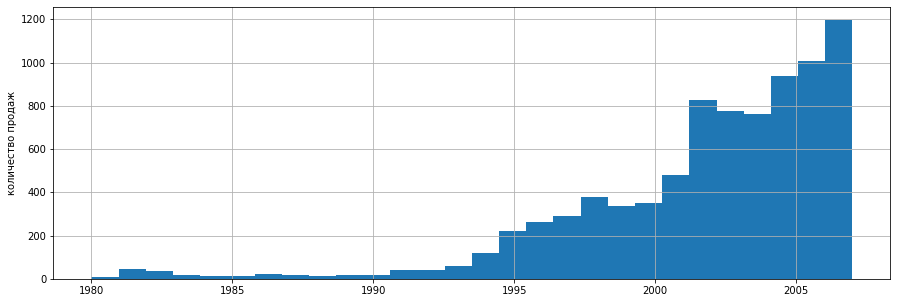

In [42]:
data['year_of_release'].hist(bins=28,range=(1980,2007), figsize=(15,5)).set(ylabel='количество продаж')

[Text(0, 0.5, 'количество продаж')]

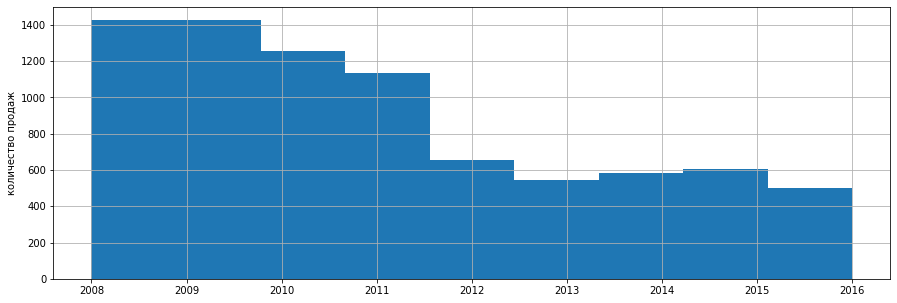

In [43]:
data['year_of_release'].hist(bins=9,range=(2008,2016), figsize=(15,5)).set(ylabel='количество продаж')

In [44]:
data = data.query('year_of_release >=1992 and year_of_release<=2015 ')

In [45]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,1,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,1,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,31.38
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,1,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16437,woody woodpecker in crazy castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,rp,0.01
16438,score international baja 1000: the official game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,rp,0.00
16440,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,rp,0.01


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [46]:
data['platform'].describe()

count     15680
unique       30
top         PS2
freq       2127
Name: platform, dtype: object

In [47]:
data['platform'] = data['platform'].str.lower()

/tmp/ipykernel_1001/2160614097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['platform'] = data['platform'].str.lower()


<AxesSubplot:>

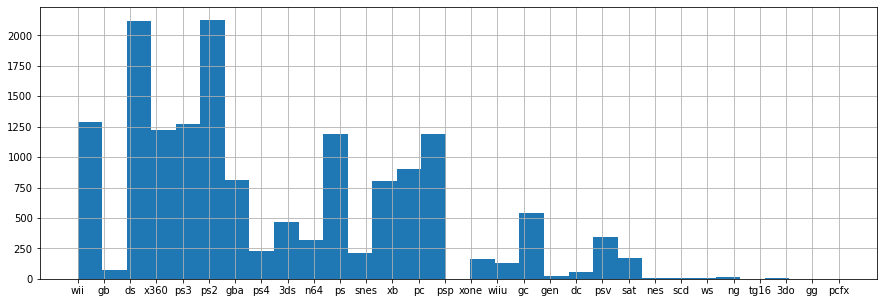

In [48]:
data['platform'].hist(bins=31,figsize=(15,5))

In [49]:
#подправил
data_top = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .head(10)
)

In [50]:
data_top

,total_sales
platform,
ps2,1233.56
x360,959.72
ps3,927.74
wii,891.00
ds,802.76
ps,727.58
gba,312.88
psp,289.53
xb,251.57


<div style="border:solid steelblue 1px; padding: 20px">
    По сводной таблице мы видим, что игр на ps2 было продано на большую сумму денег. Интересен тот факт, что игр на ds было продано практически столько же, но из-за того, что, видимо, цена их была ниже - на ней заработали меньше денег - в таблице она находится лиш на 5 месте.

In [51]:
#перезапишем переменную, тк она не понадобится в дальнейшем
top_pl = ["ps2", "x360", "ps3", "wii", "ds"]
data_top = data.query('platform in @top_pl')

In [52]:
data_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,1,82.54
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,1,32.77
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,1,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,1,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16427,mega brain boost,ds,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,1,0.01
16429,mezase!! tsuri master ds,ds,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16433,plushees,ds,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,1,0.01
16438,score international baja 1000: the official game,ps2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,rp,0.00


In [53]:
data_top = data_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [54]:
data_top

platform,ds,ps2,ps3,wii,x360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


<AxesSubplot:xlabel='year_of_release'>

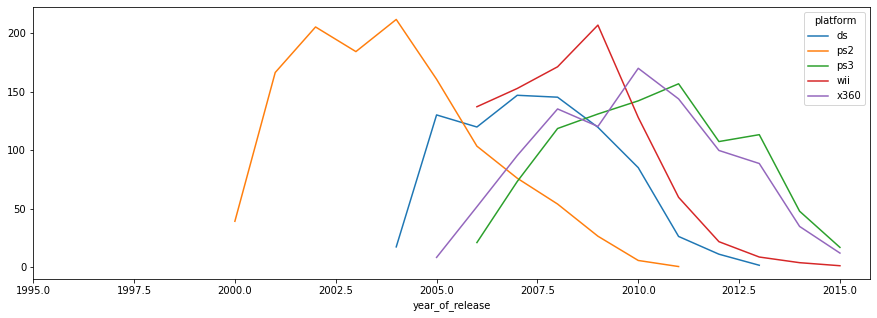

In [55]:
data_top.plot(xlim=1995, figsize=(15,5))

По графику видно что отрезок "жизни" игры составляет 7-10 лет. как мы видим, расцвет игровой индустрии приходится на 2005-2006г. Именно в те годы начали зарождаться игры на самые популярные и прибыльные платформы.

Таким образом актуальными можно счиать платформы, которые еще не старше 4 лет, так как по статитстике им отстается прожить еще столько же.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

- Возьмем данные только за актуальный период. и рассмотрим, продажи по каким платфофрмам возрастают, находятся на своем пике, а какие умирают.


In [57]:
first_year = pd.DataFrame(data.pivot_table(index='platform', values='year_of_release', aggfunc='min'))

actual_platform =[]

for i in first_year:
    print(2016 - first_year[i])
actual_platform = ['3ds', 'ps4', 'psv', 'wiiu', 'xone', 'pc']

platform
3do     22
3ds      5
dc      18
ds      12
gb      24
gba     16
gc      15
gen     24
gg      24
n64     20
nes     24
ng      23
pc      24
pcfx    20
ps      22
ps2     16
ps3     10
ps4      3
psp     12
psv      5
sat     22
scd     23
snes    24
tg16    21
wii     10
wiiu     4
ws      17
x360    11
xb      16
xone     3
Name: year_of_release, dtype: int64


In [58]:
# подумал, что с 2012 года - оптимальное решение - ни слишком большой отрезок, ни слишком корот
data_actual = data.query('year_of_release>=2012 and platform in @actual_platform')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,4,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,rp,11.68
62,new super mario bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,1,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16396,hanasaku manimani,psv,2014,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16397,fujiko f. fujio characters: great assembly! sl...,3ds,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16407,end of nations,pc,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,3,0.01
16421,metal gear solid v: ground zeroes,pc,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,4,0.01


In [59]:
data_pl = data_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_pl = pd.DataFrame(data_pl)

<AxesSubplot:xlabel='year_of_release'>

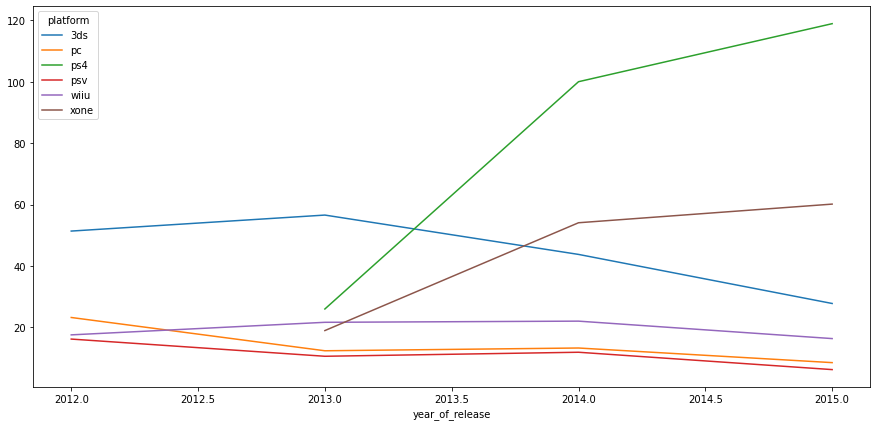

In [60]:
data_pl.plot(figsize=(15,7))

In [61]:
qw = data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
qw

year_of_release,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,,,,,,,,,,,,
3do,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,116.0,93.0,91.0,80.0,86.0
dc,NaN,NaN,NaN,NaN,NaN,NaN,7.0,14.0,20.0,8.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN
gb,7.0,NaN,3.0,4.0,6.0,8.0,8.0,11.0,17.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,107.0,...,39.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,40.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gen,6.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border:solid steelblue 1px; padding: 20px">
Так, сопоставив срок жизни платформы и то, сколько на ней заработали в предыдущих годах можно сделатььследующий вывод: xone и ps4 находятся только на стадии роста, в то время как остальные платформы медленно сдают свои позиции. 
<br /> Однако, и на падающих продаж тоже возможно заработать. К таким платформам относятся wiiu, 3ds. Так же pc долгое время сохраняют свои позиции, поэтому на них тоже стоит обратить внимание. 

In [62]:
actual_pl = ["ps4", "xone", "wiiu", "pc", "3ds"]

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [63]:
data_year = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_year

platform,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,...,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,NaN,NaN,25.49,NaN,NaN,12.64,0.04,NaN,...,NaN,NaN,32.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,NaN,...,NaN,1.50,40.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,NaN,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,NaN,34.10,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,NaN,39.50,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,NaN,49.24,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,NaN,57.87,...,0.09,NaN,0.26,NaN,NaN,NaN,0.46,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,NaN,33.97,...,NaN,NaN,NaN,NaN,NaN,NaN,0.68,NaN,0.99,NaN


In [64]:
data_year = data_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales')
data_year

platform,3ds,pc,ps4,psv,wiiu,xone
year_of_release,,,,,,
2012,0.552258,0.380656,NaN,0.305472,0.548750,NaN
2013,0.621648,0.325789,1.624375,0.168095,0.515476,0.997895
2014,0.547000,0.282553,1.333333,0.119000,0.710645,0.886393
2015,0.323023,0.170400,0.867883,0.056818,0.583929,0.751750


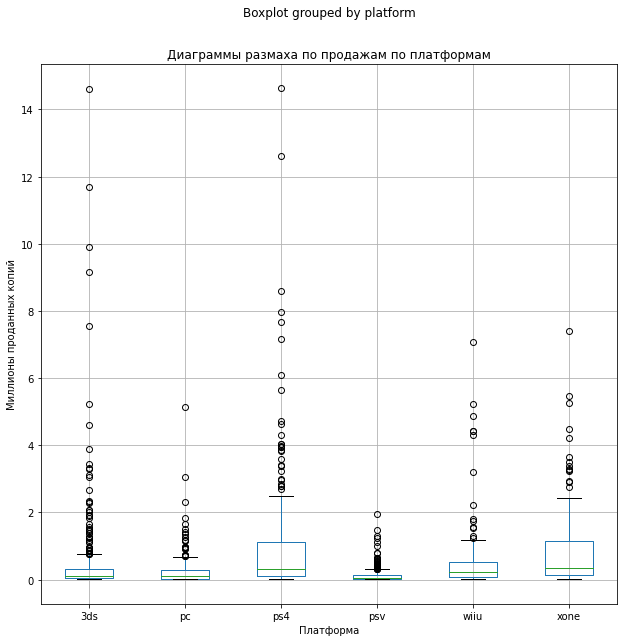

In [66]:
data_actual[['total_sales', 'platform']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха по продажам по платформам')
plt.show()

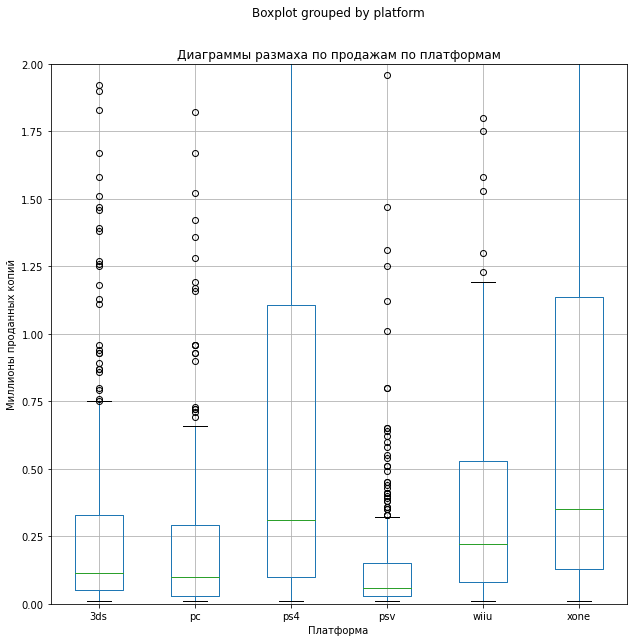

In [67]:
data_actual[['total_sales', 'platform']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха по продажам по платформам')
plt.ylim(0,2)
plt.show()

<div style="border:solid steelblue 1px; padding: 20px">
    По данному графику заметно распредление сумм продаж игр по платформам.Так, мы видим, что у моей любимой psp разброс данных мал, оно и понятно, тк это недорогая платформа с недорогими играми, которые можно было скачать из интеренета)

Если говорить серьезно, то диагрмма размаха продаж игр по платформам демонстрирует, что наибольшие выбросы у таких платформ как 3ds, ps3, ps4, x360. наиболее стабильной из популярных платформ является xone

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [68]:
sample = data.query('platform == "x360"')
sample

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,1,21.82
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,4,16.27
29,call of duty: modern warfare 3,x360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,4,14.73
32,call of duty: black ops,x360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,4,14.62
35,call of duty: black ops ii,x360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,4,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16342,dragon ball z for kinect,x360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,3,0.01
16351,world snooker championship 2007,x360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,rp,0.01
16376,metal gear solid hd edition,x360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,4,0.01
16383,ben 10 omniverse 2,x360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,110+,0.01


In [69]:
sample['total_sales'].corr(sample['user_score'])

0.11124535675258383

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

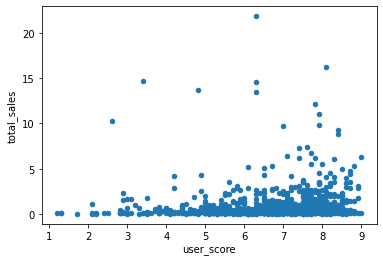

In [70]:
sample.plot(x='user_score', y='total_sales', kind='scatter') 

In [71]:
sample['total_sales'].corr(sample['critic_score'])

0.3928658925400695

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

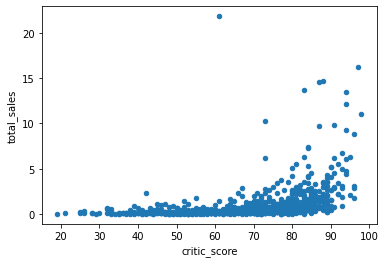

In [72]:
sample.plot(x='critic_score', y='total_sales', kind='scatter') 

In [73]:
for i in actual_pl:
    print(i)
    data_select = data_actual.query('platform == @i')
    print('Корреляция между оценкой критиков и продажами:', data_select.critic_score.corr(data_select.total_sales))
    print('Корреляция между оценкой пользователей и продажами:', data_select.user_score.corr(data_select.total_sales))
    print()

ps4
Корреляция между оценкой критиков и продажами: 0.4318482049982005
Корреляция между оценкой пользователей и продажами: 0.024230832360622557

xone
Корреляция между оценкой критиков и продажами: 0.45938456807071054
Корреляция между оценкой пользователей и продажами: -0.03926828544552199

wiiu
Корреляция между оценкой критиков и продажами: 0.3546914930621983
Корреляция между оценкой пользователей и продажами: 0.4132654178028673

pc
Корреляция между оценкой критиков и продажами: 0.26315662774565857
Корреляция между оценкой пользователей и продажами: -0.15922791823300494

3ds
Корреляция между оценкой критиков и продажами: 0.3331477996346886
Корреляция между оценкой пользователей и продажами: 0.21056681222463666



<div style="border:solid steelblue 1px; padding: 20px">
Наблюдается прямая умеренная зависимость между оценков критиков и общими продажами - чем выше оценка, тем больше суммв продаж. Между оценкой пользователя и суммой продаж только у платформы wiiu корреляция достигает умеренной, в остальных же платформах корреляция либо слабая либо отсутствует. 

Рассматривая диаграммы рассеяние можно сделать вывод, что зависимость не такая явная из-за наличия выбросов - игры с высокими продажами, не смотря на на низкую оценку пользователей или же критиков. При этом пользователи ошибались чаще, нежели критики и график их оценок менее структурированный.

Сопоставляя результат с другими играми можно заметить ту же закономерность.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

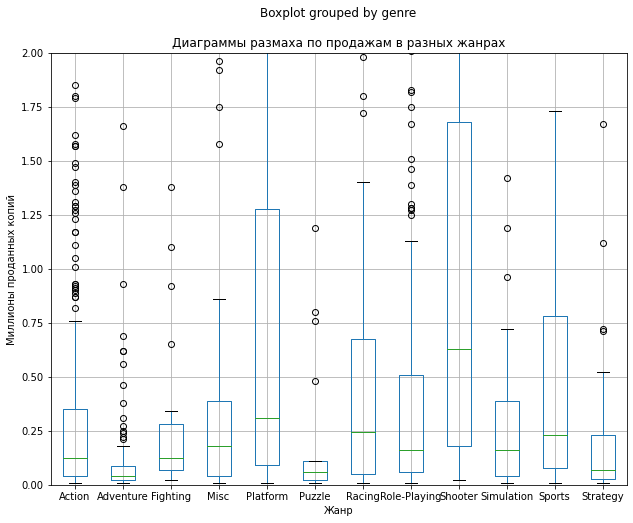

In [75]:
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0,2)
plt.show()

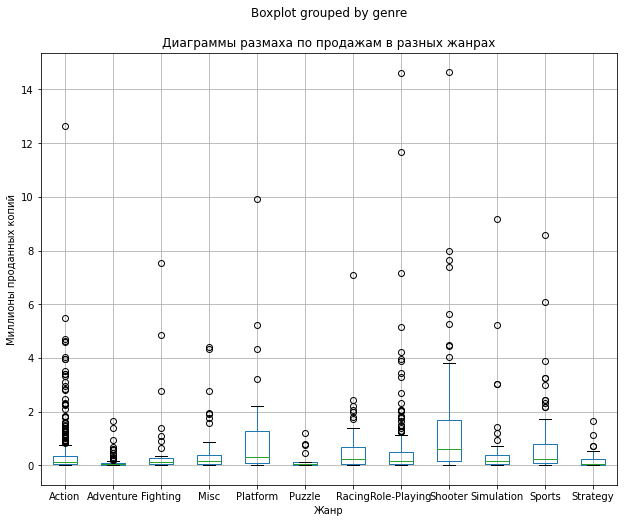

In [76]:
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

<div style="border:solid steelblue 1px; padding: 20px">
Наиболее стабильными жанрами про продажам являются пазлы, стратегии, приключения - разброс из значений наименьший. Стоит обратить внимание на шутер  - распределение продаж более ровное и стабильное, нежели у экшена - самого прибыльного жанра.

## Портрет пользователя каждого региона

### Самые популярные жанры (топ-5). Поясните разницу.

[Text(0, 0.5, 'total_sales')]

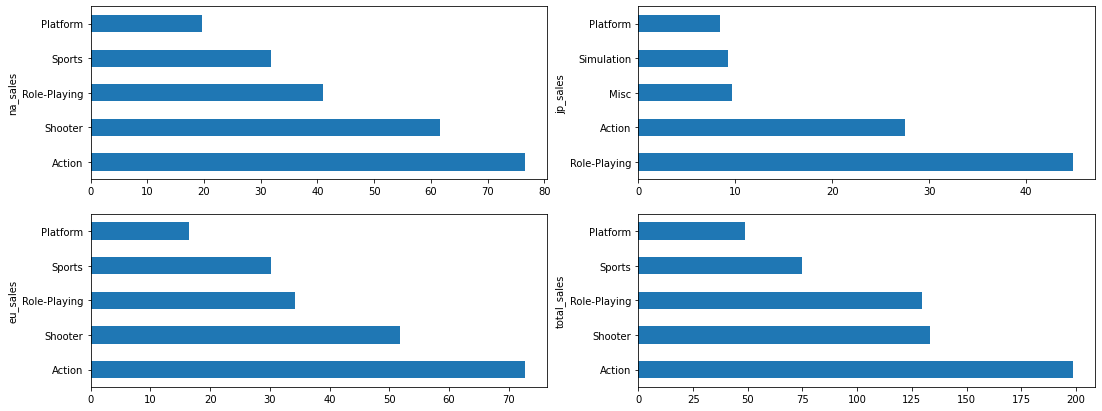

In [77]:
#проанализируем продажи по жанрам для каждого региона
fig, axis = plt.subplots(2,2, figsize=(18,7))
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[0,0]).set(ylabel='na_sales')
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[0,1]).set(ylabel='jp_sales')
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[1,0]).set(ylabel='eu_sales')
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[1,1]).set(ylabel='total_sales')

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

[Text(0, 0.5, 'total_sales')]

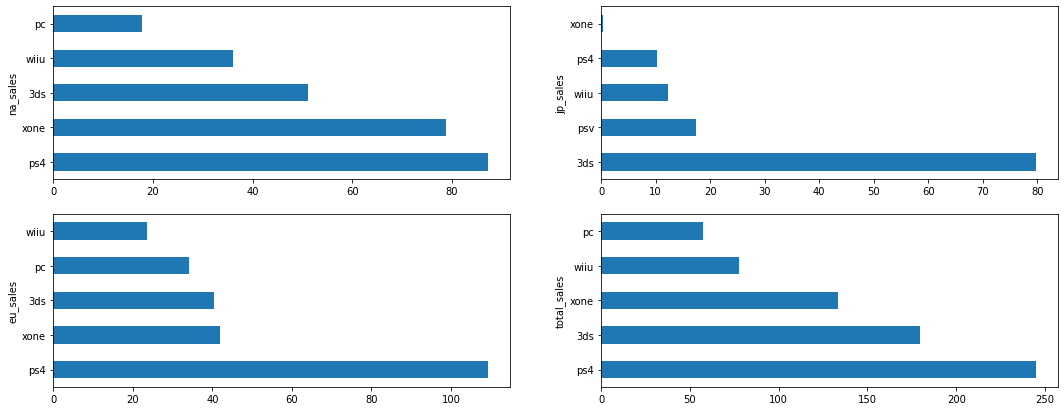

In [78]:
fig, axis = plt.subplots(2,2,  figsize=(18,7))
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[0,0]).set(ylabel='na_sales')
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[0,1]).set(ylabel='jp_sales')
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[1,0]).set(ylabel='eu_sales')
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().plot.barh(ax=axis[1,1]).set(ylabel='total_sales')


In [79]:
other_platforms_na_sales = (data_actual.groupby('platform')['na_sales']
                         .sum()
                         .sort_values(ascending=True)
                         .tail().sum()) 
#cумма продаж других платформ, вне топ5 по америке

In [80]:
df = pd.DataFrame(data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=True))
#df.append(['other', other_platforms_na_sales])

In [81]:
other_platforms_na_sales

271.03

### влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [82]:
data_actual['rating'].unique()

array(['rp', '4', '1', '3', '110+'], dtype=object)

In [85]:
rating = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales')
rating

,eu_sales,jp_sales,na_sales
rating,,,
3,26.77,13.15,31.19
110+,27.47,7.18,36.73
1,57.33,23.01,58.35
rp,61.39,68.84,64.70
4,87.47,7.95,90.89


<AxesSubplot:xlabel='rating'>

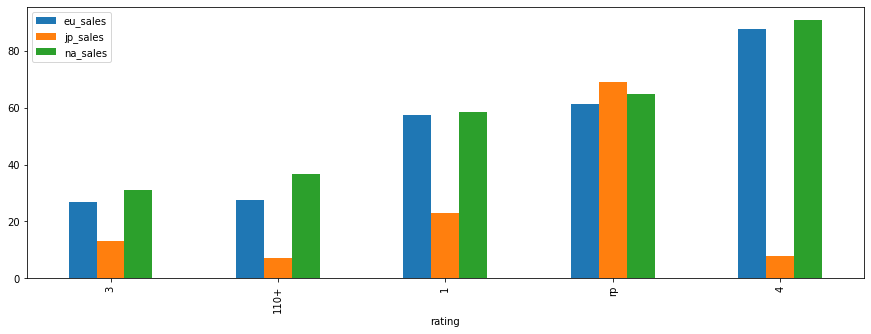

In [86]:
rating.plot(kind='bar', figsize=(15, 5))

<div style="border:solid steelblue 1px; padding: 20px">
Выводы по портрету потребителя:
1) Японские игроки предпочитают жанр ролевых игры и экшн. По платформам с огромным отрывом лидирует 3ds. Так же стоит обратить внимание на то, что достаточно большой игр, в которые играют в японии рейтинг не присвоен. Подобное возможно из-за наличия национального рейтингового агентсва.

2) Американский рынок. Подавляющее большинство игроков в Америке старше 18 лет. Предпочитают играть экшн, шутеры и ролевые игры. Самой популярной платфомой является ps4 и xone.

3) третья группа - игроки из европы. По возростному рейтингу можно проследить, что большинство игроков старше 18 лет (или ими притворяются). Предпочтения в жанрах игр у них совпадают с американцам. По платформам с большим отрывом лидирует ps4.

## Проверка гипотез

### Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div style="border:solid steelblue 1px; padding: 20px">
    нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны 

альтернатив гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [87]:
sample_1 = data_actual.loc[(data_actual['platform']== 'xone') & (data_actual['user_score']>0) & 
                           (data_actual['year_of_release']>=2013), 'user_score'].dropna() 

In [88]:
sample_2 = data_actual.loc[(data_actual['platform']== 'pc') & 
                           (data_actual['user_score']>0) & (data_actual['year_of_release']>=2013), 'user_score'].dropna()

In [89]:
alpha = 0.05 
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

In [90]:
print('p-значение:', results.pvalue)

p-значение: 0.2867036680187632


In [92]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 1px; padding: 20px">
    
Подобный результат p-value говорит о том, что сущетсвует слишком большая вероятность получить различия между средними пользовательскими рейтингами платформ Xbox One и PC __случайно__. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<div style="border:solid steelblue 1px; padding: 20px">
нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны

альтернатив гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны

In [93]:
sample_1 = data_actual.loc[(data_actual['genre']== 'Action')& (data_actual['user_score']>0), 'user_score'].dropna() 

In [94]:
sample_1 = data_actual.loc[(data_actual['genre']== 'Sports')& (data_actual['user_score']>0), 'user_score'].dropna() 

In [95]:
alpha = 0.05 
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

In [96]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.860798774281105e-09
Отвергаем нулевую гипотезу


<div style="border:solid steelblue 1px; padding: 20px">
Подобный результат p-value говорит о том, что сущетсвует слишком малая вероятность получить различия между средними пользовательскими рейтингами жанров экшн и сопрт СЛУЧАЙНо. Это слишком малая вероятность, чтобы утверждать незначительность различия между ними.

## Общий вывод

<div style="border:solid steelblue 1px; padding: 20px">
    Была изучены выборка выходивших игры с 1980 по 2016 года. Она отображает платформы на которых выходили игры, их рейтинг средипользователей и критиков, продажи по странам/частям света.

Анализ показал, что стоит оратить внимание на то, что продажи ps4 и xone только находятся на своем пути к топам продаж, в то время как отсальные платформы медленно, но верно стремятся к нулю. 

Было выявлено, что самыми популярными жанрами игр являются Action, shooter и role-playing
Самыми популярными актуальными платформами являются ps4(самая популярная платформа в америке и европе), 3ds (вошла в топ, тк является самой поуплярной платформой в японии), xone

Рейтинговая шкала доказала, что с возрастом люди больше склонны тратить деньги на игры.В японии популярны игры без рейтинга - скорее всего это игры, произведенные в самой японии и не попадающие по рейтинг ESRB.

Наибольшее влияние на продажи игр оказывает мнение критиков, нежели мнение самих пользователей.